In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np

covertype_dataset = pickle.load(open("covertype_dataset.pickle", "rb"))
hypothesis = RandomForestClassifier(n_estimators=100, random_state=101)
calibration = CalibratedClassifierCV(
    hypothesis, method="sigmoid", cv=5
)  # maps the result to probability
covertype_X = covertype_dataset.data[:15000, :]
covertype_Y = covertype_dataset.target[:15000]
covertype_test_X = covertype_dataset.data[15000:25000, :]
covertype_test_Y = covertype_dataset.target[15000:25000]

D:\Python\Lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Python\Lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Python\Lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
hypothesis.fit(covertype_X, covertype_Y)
calibration.fit(covertype_X, covertype_Y)
prob_raw = hypothesis.predict_proba(covertype_test_X)
prob_cal = calibration.predict_proba(covertype_test_X)

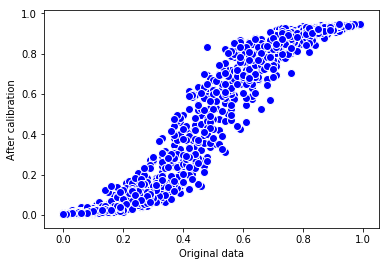

In [6]:
%matplotlib inline
covertypes = [
    "Spruce/Fir",
    "Lodgepole Pine",
    "Ponderosa Pine",
    "Cottonwod/Wollow",
    "Aspen",
    "Dougles-fir",
    "Krummholz",
]
tree_kind = covertypes.index("Ponderosa Pine")
probs = pd.DataFrame(
    list(zip(prob_raw[:, tree_kind], prob_cal[:, tree_kind])),
    columns=["Original data", "After calibration"],
)
plot = probs.plot(kind="scatter", x=0, y=1, s=64, c="blue", edgecolors="white")